**TABLE OF CONTENTS**
>  1.  PREFACE
1.  > DATA SOURCE
1.  > DATA STORY
>  2. DEMOGRPHICS
1. > GENDER
1.  >AGE
1.  >COUNTRY
1.  >EDUCATION
1.  >EMPLOYMENT
>  3. TOOLS AND TECHNIQUES
1. >PROGRAMMING LANGUAGE
1. >TIME SPENT ON EACH TASK
>  4. INCOME 
1. >INCOME DISTRIBUTION
1. >INCOME VS GENDER
1. >INCOME VS EDUCATION
1. >INCOME VS JOB TITTLE
1. >INCOME VS AGE
>  5. INCOME PREDICTION
>  6. CONCLUSION

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import plotly.plotly as py
import plotly.graph_objs as go
import folium

In [220]:
cvRates = pd.read_csv('../input/conversionRates.csv')
freeForm = pd.read_csv('../input/freeformResponses.csv')
main = pd.read_csv('../input/multipleChoiceResponses.csv', encoding="ISO-8859-1")
schema = pd.read_csv('../input/schema.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning:

Columns (5,17,21,38,50) have mixed types. Specify dtype option on import or set low_memory=False.

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning:

Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.



**1.  PREFACE**


**2. DEMOGRAPHICS**

**2.A GENDER**

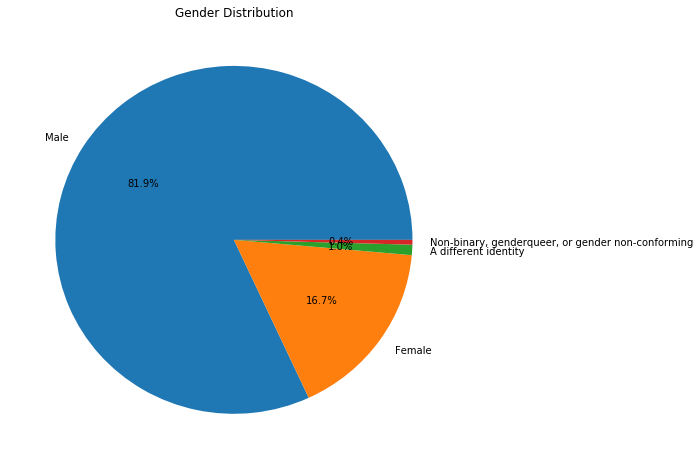

Proportion of women in this survey: 16.71% 
Proportion of men in this survey: 81.88% 


In [246]:
plt.figure(figsize=(8,8))
gender=main['GenderSelect'].value_counts()
plt.pie(gender,labels=gender.index,autopct='%.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
plt.title('Gender Distribution')

plt.show()
print('Proportion of women in this survey: {:0.2f}% '.format(100*len(main[main['GenderSelect']=='Female'])/len(main['GenderSelect'].dropna())))
print('Proportion of men in this survey: {:0.2f}% '.format(100*len(main[main['GenderSelect']=='Male'])/len(main['GenderSelect'].dropna())))

**2. B AGE**

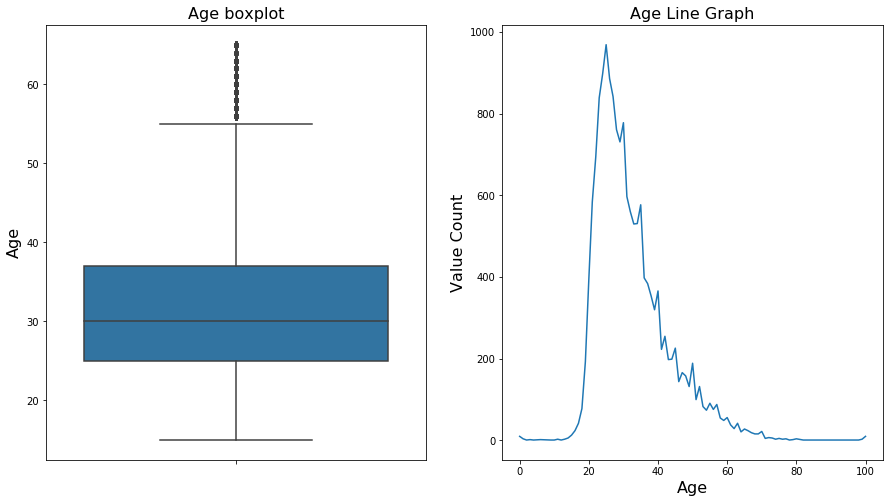

In [247]:
age=main[(main['Age']>=15) & (main['Age']<=65) ]
age_series=main['Age'].value_counts()
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot( y=age['Age'],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)

plt.subplot(1,2,2)
plt.title('Age Line Graph', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Value Count',fontsize=16)
sns.lineplot(x=age_series.index, y=age_series.values)


plt.show()

**2. C. COUNTRY**



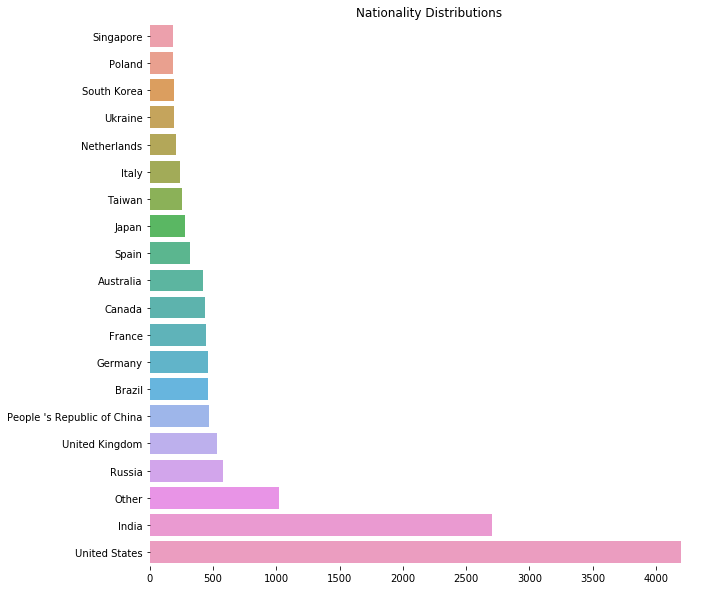

25.11% of the instances are Americans
16.18% of the instances are Indians
31.10% of the instances are contributed by top 5 countries


In [248]:
country=main['Country'].value_counts().sort_values().tail(20)
plt.figure(figsize=(10,10))
sns.barplot(y=country.index, x=country.values,alpha=0.9)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Nationality Distributions')
plt.show();
top_5=0
for i in [1,2,4,5,6]:
    top_5=top_5+country.sort_values(ascending=False)[i]
top_5=100*(top_5/len(main))
print('{:0.2f}% of the instances are Americans'.format(100*len(main[main['Country']=='United States'])/len(main)))
print('{:0.2f}% of the instances are Indians'.format(100*len(main[main['Country']=='India'])/len(main)))
print('{:0.2f}% of the instances are contributed by top 5 countries'.format(top_5))

**2 D. EDUCATION**


**Highest Formal Education**

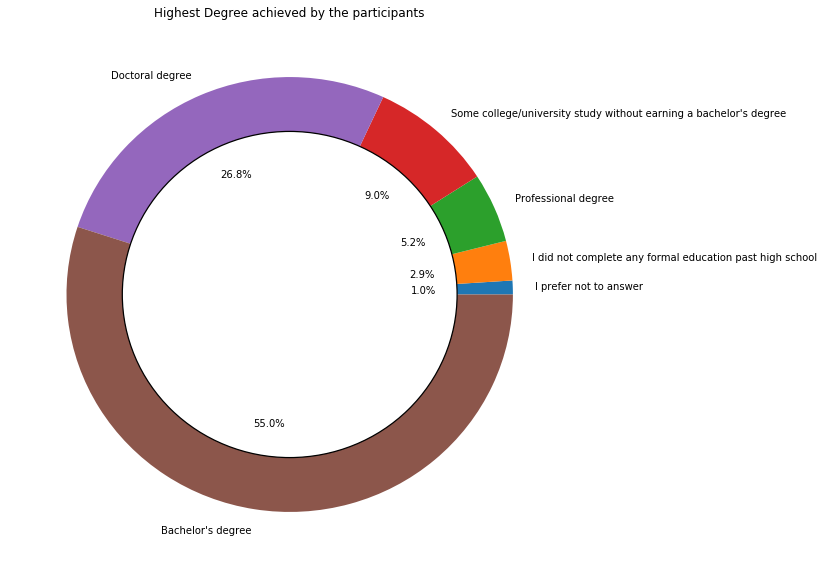

In [249]:
education=main['FormalEducation'].value_counts().sort_values()[:6]
plt.figure(figsize=(10,10))
plt.pie(x=education,labels=education.index,autopct='%.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Highest Degree achieved by the participants')
plt.show()

**Degree Majored in**

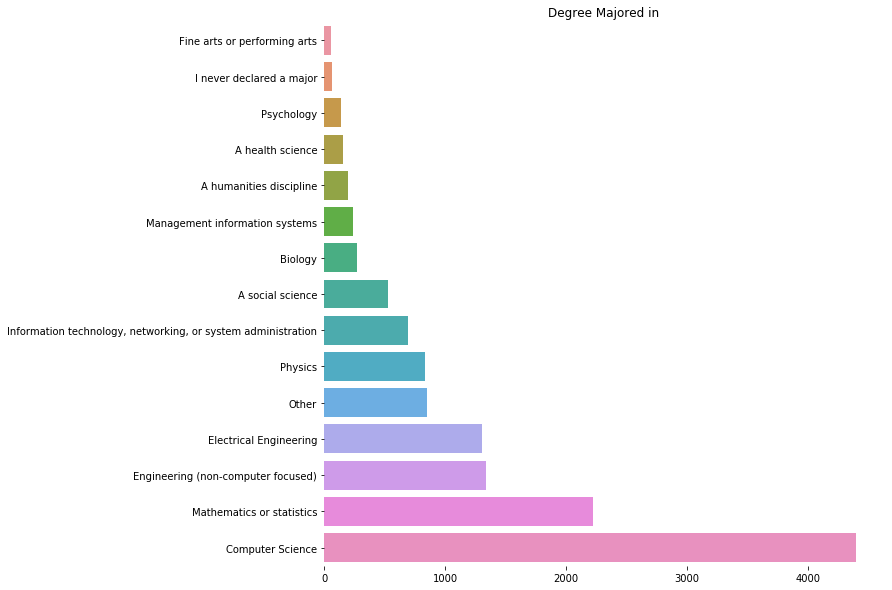

In [250]:
major=main['MajorSelect'].value_counts().sort_values(ascending=True)
major
plt.figure(figsize=(10,10))
sns.barplot(x=major.values,y=major.index)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Degree Majored in')
plt.show();

**Where do participants go to learn outside the college?
**

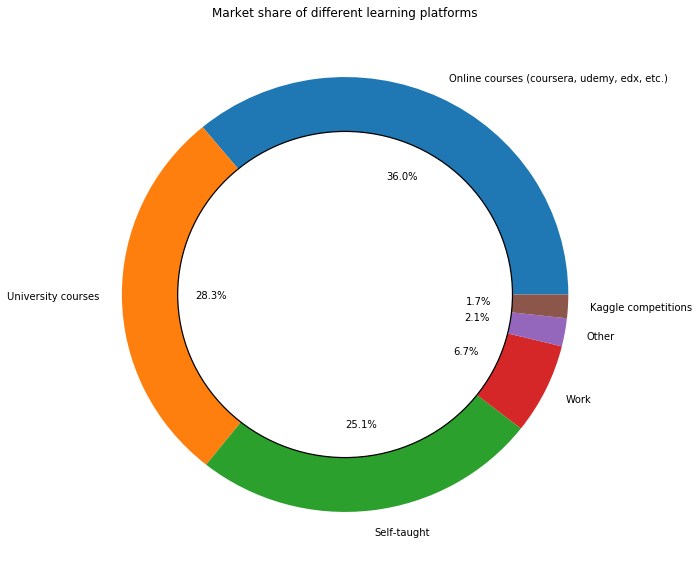

In [251]:
informal=main['FirstTrainingSelect'].value_counts()
informal
plt.figure(figsize=(10,10))
plt.pie(x=informal.values,labels=informal.index,autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Market share of different learning platforms')

plt.show()

**2.E. EMPLOYMENT**

Employment status

In [252]:
employment=main['EmploymentStatus'].value_counts()
employment_df=pd.DataFrame(employment)
n_employed= employment[0]+employment[2]+employment[4]
n_unemployed=employment[1]+employment[3]
x=[n_employed,n_unemployed]



**Emplyed vs Unemployed**

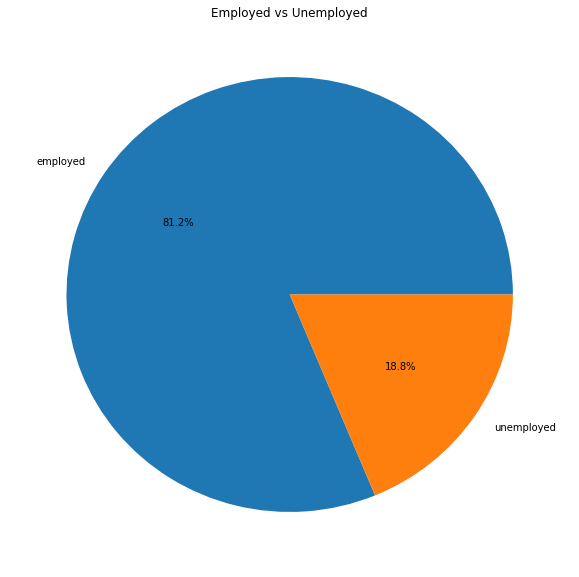

In [253]:
plt.figure(figsize=(10,10))
plt.pie(x=x,labels=['employed','unemployed'],autopct='%1.1f%%')
plt.title("Employed vs Unemployed")
plt.show();

**Which Job title is in demand**

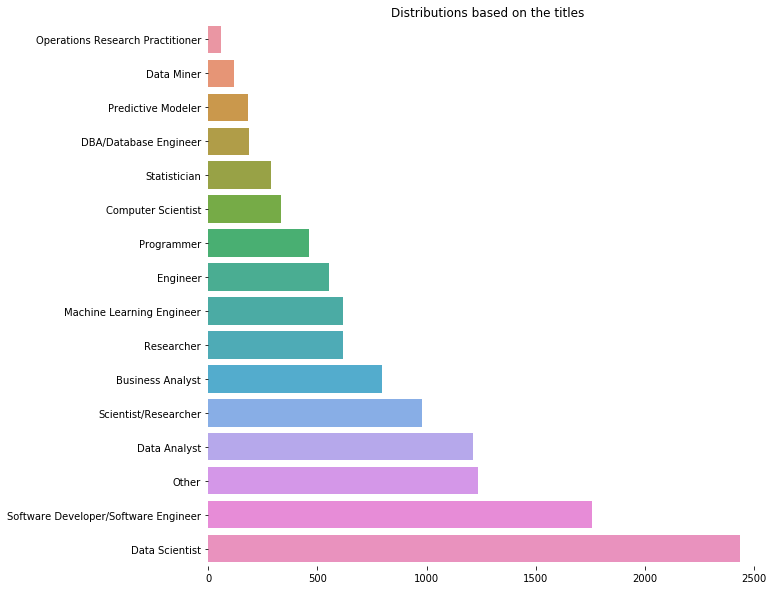

In [254]:
title=main['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10,10))
sns.barplot(x=title.values,y=title.index)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Distributions based on the titles')
plt.show();

**Are the Participants looking for a change?**

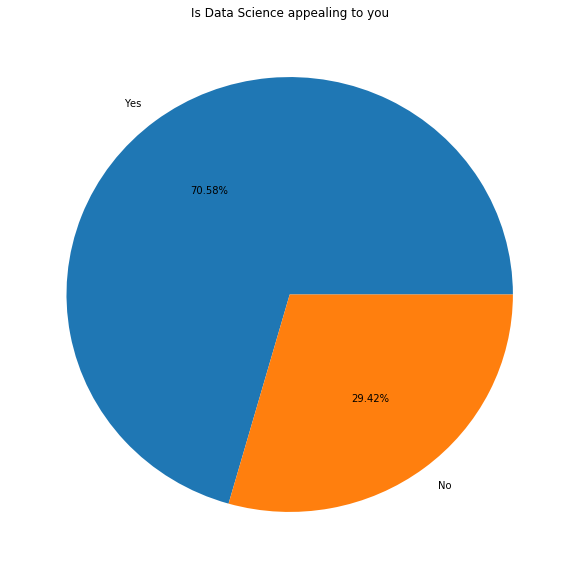

In [255]:
change = main['CareerSwitcher'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(change,labels=change.index,autopct='%1.2f%%')
plt.title('Is Data Science appealing to you')
plt.show();

**3. TOOLS/TECHNIQUES **


**3.A. PROGRAMMING LANGUAGE
**

Python users:  3438
R users:  1851
Python+R users:  878
Out of the 16000 Participants, only 6167 participants have answered that question


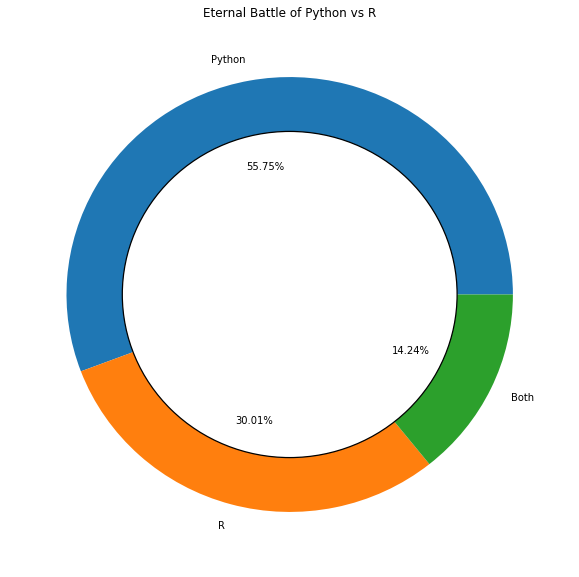

In [256]:
lang=main[["WorkToolsFrequencyR","WorkToolsFrequencyPython"]].fillna(0)
lang.replace(to_replace=['Rarely','Sometimes','Often','Most of the time'], 
           value=[1,2,3,4], inplace=True)
lang['PythonVsR'] = [ 'R' if (freq1 >2 and freq1 > freq2) else
                    'Python' if (freq1<freq2 and freq2>2) else
                    'Both' if (freq1==freq2 and freq1 >2) else
                    'None' for (freq1,freq2) in zip(lang["WorkToolsFrequencyR"],lang["WorkToolsFrequencyPython"])]
main['PythonVsR']=lang['PythonVsR']

df = main[main['PythonVsR']!='None']
print("Python users: ",len(df[df['PythonVsR']=='Python']))
print("R users: ",len(df[df['PythonVsR']=='R']))
print("Python+R users: ",len(df[df['PythonVsR']=='Both']))
print('Out of the 16000 Participants, only 6167 participants have answered that question')
langg=lang['PythonVsR'].value_counts().drop('None')
plt.figure(figsize=(10,10))
plt.pie(x=langg,labels=langg.index,autopct='%1.2f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Eternal Battle of Python vs R')
plt.show();

**3. B TIME SPENT ON TASKS**

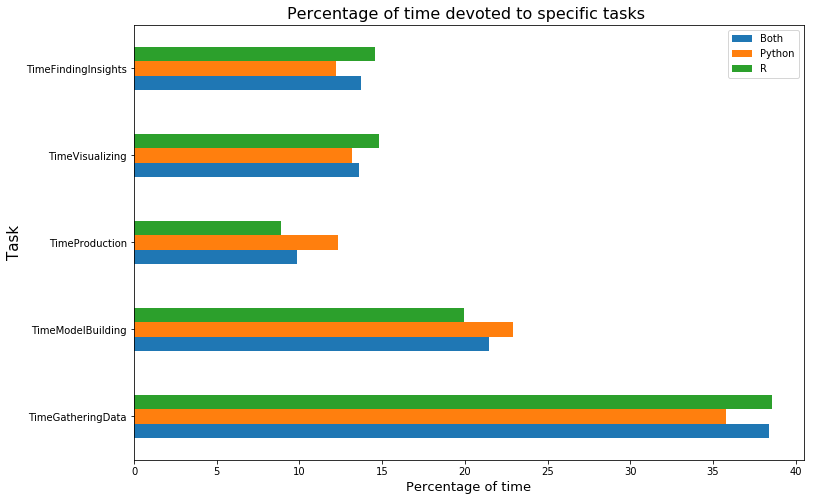

In [257]:
d_task={}
tasks=['TimeGatheringData','TimeModelBuilding','TimeProduction','TimeVisualizing','TimeFindingInsights']
for task in tasks : 
    d_task[task]={'Python':df[df['PythonVsR']=='Python'][task].mean(),
                  'R':df[df['PythonVsR']=='R'][task].mean(),
                  'Both':df[df['PythonVsR']=='Both'][task].mean()}
    
(pd.DataFrame(d_task)).transpose().plot(kind='barh',figsize=(12,8))
plt.ylabel("Task", fontsize=15)
plt.xlabel("Percentage of time", fontsize=13)
plt.title("Percentage of time devoted to specific tasks ", fontsize=16)
plt.show();

**4. INCOME**


In [258]:
demographic_features = ['GenderSelect','Country','Age',
                        'FormalEducation','MajorSelect','ParentsEducation',
                        'EmploymentStatus', 'CurrentJobTitleSelect',
                        'DataScienceIdentitySelect','CodeWriter',
                        'CurrentEmployerType','JobFunctionSelect',
                        'SalaryChange','RemoteWork','WorkMLTeamSeatSelect',
                        'Tenure','EmployerIndustry','EmployerSize','PythonVsR',
                        'CompensationAmount']
data_dem = main[demographic_features]
data_dem.head(5)

,GenderSelect,Country,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Bachelor's degree,Management information systems,A doctoral degree,Employed full-time,DBA/Database Engineer,Yes,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,I am not currently employed,Always,Standalone Team,More than 10 years,Internet-based,100 to 499 employees,None,NaN
1,Female,United States,30.0,Master's degree,Computer Science,A bachelor's degree,"Not employed, but looking for work",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Less than a year,NaN,NaN,None,NaN
2,Male,Canada,28.0,Master's degree,Engineering (non-computer focused),A bachelor's degree,"Not employed, but looking for work",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,3 to 5 years,NaN,NaN,None,NaN
3,Male,United States,56.0,Master's degree,Mathematics or statistics,High school,"Independent contractor, freelancer, or self-em...",Operations Research Practitioner,Yes,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased 20% or more,NaN,Standalone Team,More than 10 years,Mix of fields,NaN,None,"250,000"
4,Male,Taiwan,38.0,Doctoral degree,Engineering (non-computer focused),Primary/elementary school,Employed full-time,Computer Scientist,No,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,I do not want to share information about my sa...,Rarely,Business Department,More than 10 years,Technology,"5,000 to 9,999 employees",None,NaN


In [259]:
#Convert all salaries to floats
data_dem['CompensationAmount'] = data_dem['CompensationAmount'].fillna(0)
data_dem['CompensationAmount'] = data_dem.CompensationAmount.apply(lambda x: 0 if (pd.isnull(x) or (x=='-') or (x==0))
                                                       else float(x.replace(',','')))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



**4. A. INCOME DISTRIBUTION**

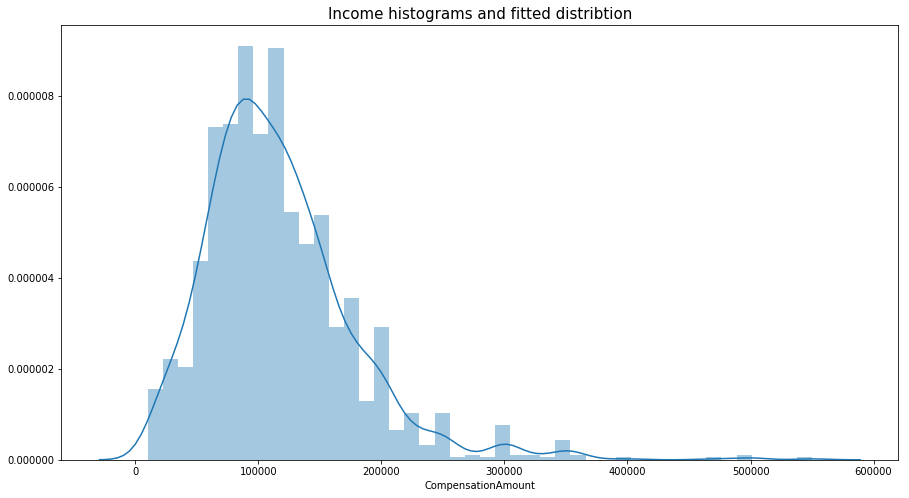

The median salary for US data scientist: 107000.0 USD
The mean salary for US data scientist: 116649.99 USD


In [260]:

data_dem = data_dem[(data_dem['CompensationAmount']>5000) & (data_dem['CompensationAmount']<1000000)]
data_dem = data_dem[data_dem['Country']=='United States']

plt.subplots(figsize=(15,8))
sns.distplot(data_dem['CompensationAmount'])
plt.title('Income histograms and fitted distribtion',size=15)
plt.show();
print('The median salary for US data scientist: {} USD'.format(data_dem['CompensationAmount'].median()
))
print('The mean salary for US data scientist: {:0.2f} USD'.format(data_dem['CompensationAmount'].mean()
))

**4.B. INCOME VS GENDER**

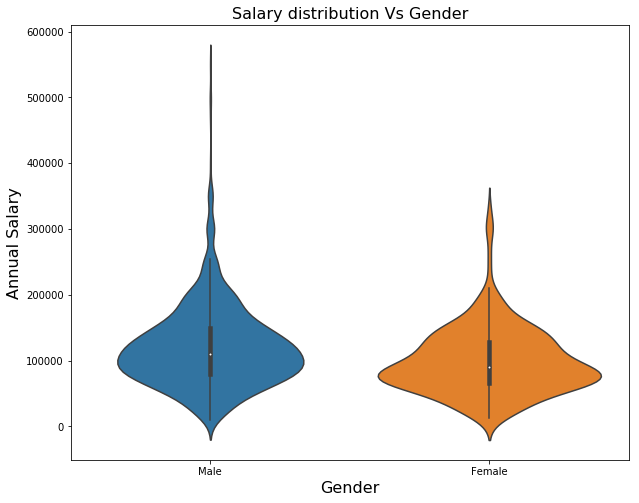

In [261]:
temp=data_dem[data_dem.GenderSelect.isin(['Male','Female'])]
plt.figure(figsize=(10,8))
sns.violinplot( y='CompensationAmount', x='GenderSelect',data=temp)
plt.title("Salary distribution Vs Gender", fontsize=16)
plt.ylabel("Annual Salary", fontsize=16)
plt.xlabel("Gender", fontsize=16)
plt.show();

**4.C INCOME VS EDUCATION******

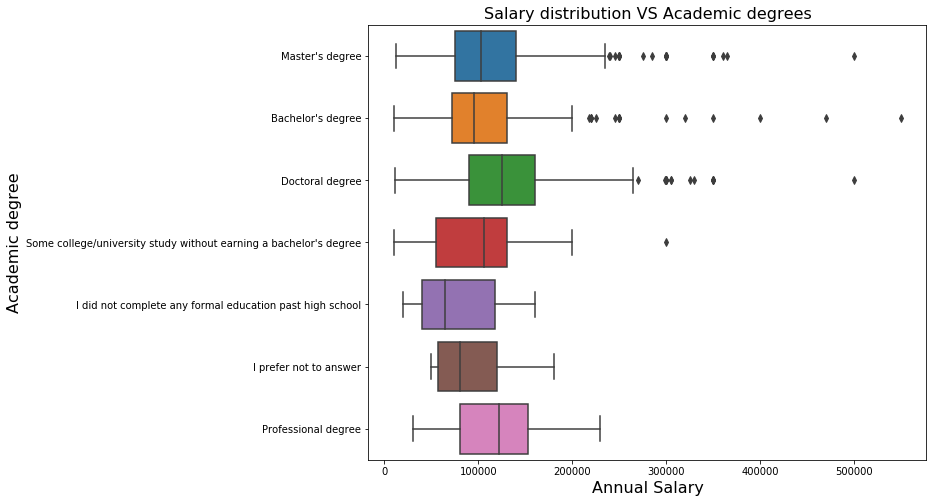

In [262]:
titles=list(data_dem['FormalEducation'].value_counts().index)
temp=data_dem[data_dem.FormalEducation.isin(titles)]
plt.figure(figsize=(10,8))
sns.boxplot( x='CompensationAmount', y='FormalEducation',data=temp)
plt.title("Salary distribution VS Academic degrees", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Academic degree", fontsize=16)
plt.show();

**4.D. INCOME VS JOB TITLE**

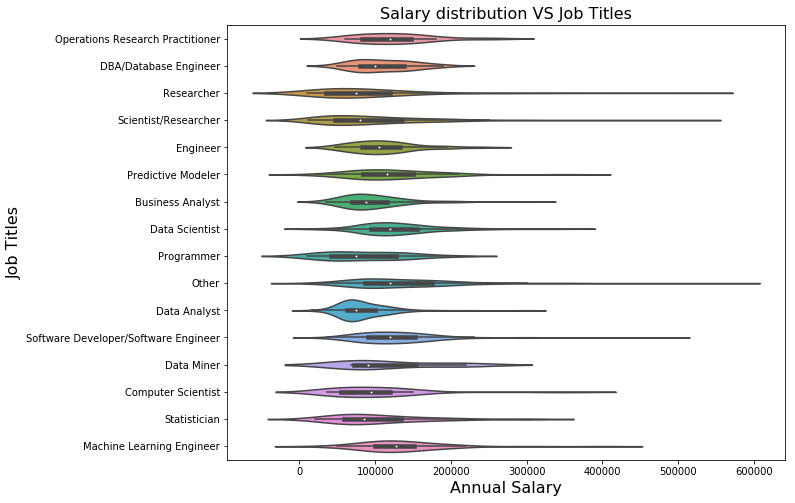

In [263]:
titles=list(data_dem['CurrentJobTitleSelect'].value_counts().index)
temp=data_dem[data_dem.CurrentJobTitleSelect.isin(titles)]
plt.figure(figsize=(10,8))
sns.violinplot( x='CompensationAmount', y='CurrentJobTitleSelect',data=temp)
plt.title("Salary distribution VS Job Titles", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Job Titles", fontsize=16)
plt.show();

**4.E. INCOME DISTRIBUTION WITH RESPECT TO AGE**

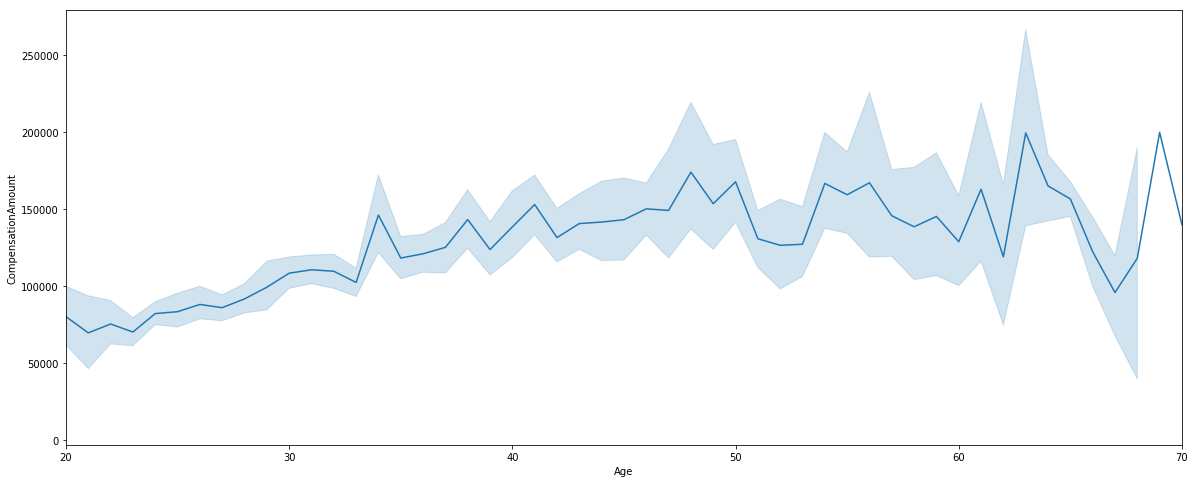

In [264]:
from scipy import stats

salvage=data_dem[['Age','CompensationAmount']]
plt.figure(figsize=(20,8))
#plt.plot(salvage['Age'],salvage['CompensationAmount'])
sns.lineplot(x=salvage['Age'],y=salvage['CompensationAmount'])
plt.xlim(20,70)

xage=data_dem['Age']

plt.show();


**5. INCOME PREDICTION**

In [265]:
temp=data_dem

target = temp['CompensationAmount']
target.replace(to_replace=[1,2], value=[0,1],inplace=True )
temp.drop('CompensationAmount',axis=1,inplace=True)
temp2=pd.get_dummies(data=temp,columns=list(temp))

np.random.seed(42)
perm = np.random.permutation(temp2.shape[0])
X_train , y_train = temp2.iloc[perm[0:round(0.8*temp2.shape[0])]] , target.iloc[perm[0:round(0.8*temp2.shape[0])]]
X_test , y_test = temp2.iloc[perm[round(0.8*temp2.shape[0])::]] , target.iloc[perm[round(0.8*temp2.shape[0])::]]

In [266]:
print('Number of US kagglers with an income lower than 130k$ : {}'.format(len(target)-target.sum()))
print('Number of US kagglers with an income higher than 130k$ : {}'.format(target.sum()))


Number of US kagglers with an income lower than 130k$ : -176489928.0
Number of US kagglers with an income higher than 130k$ : 176491441.0


**6. CONCLUSION**